In [4]:
import GetOldTweets3 as got
import nltk
import sys
from nltk.collocations import *
import pandas as pd  
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.util import ngrams
import numpy as np
import re
from nltk.corpus import stopwords, wordnet
import time
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk.corpus  
from nltk.text import Text  
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# spacy for lemmatization
#import spacy


#wordcloud 

from wordcloud import WordCloud
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from nltk.tokenize import sent_tokenize, word_tokenize
from numpy.testing import rundocs

from pprint import pprint


# Gensim
import gensim
from gensim.models import Word2Vec 

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

from sklearn.decomposition import PCA
from matplotlib import pyplot

In [ ]:
#set up api call

In [5]:
#make api call
def get_tweets(pterm, pdate1, pdate2):
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(pterm)\
                                           .setSince(pdate1)\
                                           .setUntil(pdate2)\
                                           .setMaxTweets(1000)
    
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    text_tweets = [[tweet.text] for tweet in tweets]
    #print(text_tweets)
    return text_tweets


In [6]:
#set up query
date1 = "2019-02-01"
date2 = "2020-03-23"

searchterms = [' Namibia Corona virus', 'Covid19', '#CoronaNamVirus', '#WHO', '#WHO_Namibia', '#MOHSS', 
               'Ministry of Health and Social Services','@NamTech', '#NamCovid19','Windhoek',
                'Quarantine','national lockdown', 'Working from home']
tweets = []
for term in searchterms:
    tweets.extend(get_tweets(term, date1, date2))

In [ ]:
#put into dataframe

In [7]:
df = pd.DataFrame(tweets) 

In [3]:
#can put tweets into file saves time so dont have to make api calls over and over
#df = pd.read_csv('C:/tuli/export_dataframe.csv', encoding='cp1252')


In [ ]:
#what does it look like data

In [8]:
df.shape

(7287, 1)

In [9]:
df.head()

,0
0,#Coronavirus: 711 cases &amp; 9 deaths in Sub-...
1,"As someone who actually admires Masisi,his jud..."
2,So President of Botswana has been placed in is...
3,Botswana president in coronavirus self-isolati...
4,#UPDATE: Botswana Director of Health Services ...


In [12]:
df.columns = ['twts']

In [13]:
df.columns

Index(['twts'], dtype='object')

In [10]:
df.sample(10)

,0
5278,"Especially since 45 should be in quarantine, a..."
6685,I phoned my manager and told her I will be wor...
753,LO ÚLTIMO DEL #CORONAVIRUS !!! -133 casos nuev...
6712,Negotiating your salary? Here is how you do it...
4415,"its quarantine time, perfect to binge watch lo..."
327,Coronavirus COVID-19 Global Cases. 17/3/2020 (...
3126,Acts of violence against health care workers h...
6168,(3) So why don't we do that. Everyone already ...
1628,... Heute mittag die FREIZEIT IN VOLLEN ZÜGEN ...
4269,So the woke Windhoek kids are still smoking hu...


In [14]:
df.loc[10,'twts']

'VIDEO: Zambian Papa Arrested In Namibia For Tricking People That He Has The Cure For Coronavirus https://www.zambianobserver.com/video-zambian-papa-arrested-in-namibia-for-tricking-people-that-he-has-the-cure-for-coronavirus/'

In [23]:
df.loc[21,'twts']

'BREAKING: President Mokgweetsi Masisi has been placed under self isolation for 14 days after Namibia trip #coronavirus #covid19'

In [15]:
df.loc[121,'twts']

"Heard that ED is leaving for Namibia?If so did u remind him about Corona virus?? N way let him go maybe it's a blessing in disguising.Anogona kubatwa ofa."

In [ ]:
#start cleaning

In [16]:
def preprocessing_initial_text_clean(p_df, p_text):

     # convert to string:
    #p_df = p_df.apply(p_df.to_string) # convert all columns of DataFrame

     # convert to string:

    p_df = p_df.astype(str)
    
    # remove punctuation

    p_df[p_text] = p_df[p_text].str.replace(r"[^\w\s]", "")

    # remove underscores not picked up as punctuation above

    p_df[p_text] = p_df[p_text].str.replace("_", " ")

    p_df[p_text] = p_df[p_text].str.replace("#", " ")
    # remove  numbers

    p_df[p_text] = p_df[p_text].str.replace(r"\d[,9][^19]", "")

    # lowercase

    p_df[p_text] = p_df[p_text].apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    
    stop = stopwords.words("english")

    p_df[p_text] = p_df[p_text].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    
    return p_df

In [17]:
df = preprocessing_initial_text_clean(df, 'twts')

In [18]:
df.sample(10)


,twts
4468,tl asleep quarantine scary combo
2034,one saw recession coming managing cash flow cr...
3298,dj kleva kaslam shares rendition oshiwambo tra...
126,namibia says third coronavirus patient came zi...
5541,lol pm coming national television amp telling ...
5163,argentina full governmentmandated quarantine s...
4457,matter bored get quarantine 10 push ups post i...
3612,hiring position finance officer main campus pl...
3290,corona gotta go immediately massive family fri...
4835,even quarantine cant stop spending thousands d...


In [19]:
df.head()


,twts
0,coronavirus 711 cases amp 9 deaths subsaharan ...
1,someone actually admires masisihis judgement t...
2,president botswana placed isolation trip namib...
3,botswana president coronavirus selfisolation n...
4,update botswana director health services puts ...


In [20]:
a=df['twts'].str.cat(sep=' ')

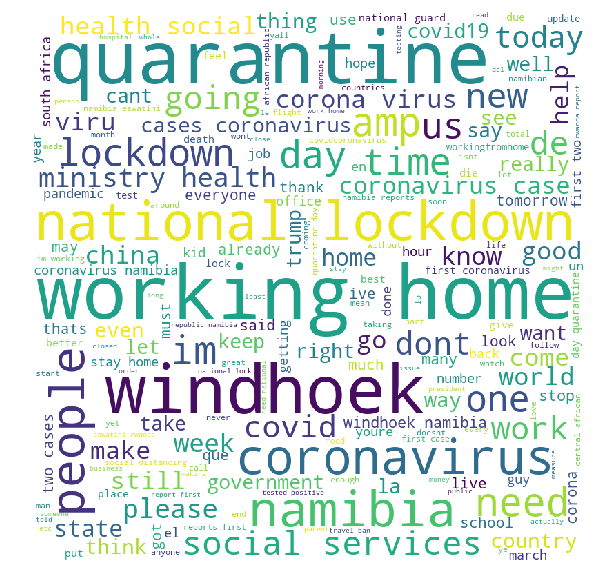

In [21]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(a) 
  
# plot the WordCloud image                        
pyplot.figure(figsize = (8, 8), facecolor = None) 
pyplot.imshow(wordcloud) 
pyplot.axis("off") 
pyplot.tight_layout(pad = 0) 
  
pyplot.show() 


In [67]:
#Ngrams are attempted in 2 disparate ways

In [23]:
alltext = list(df['twts'])

In [24]:
#first attempt at ngrams 
ngram = []
tokens = []
for line in alltext:
    token = nltk.word_tokenize(line)
    tokens.extend(token)
    ngram.extend(list(ngrams(token, 2)))
counts = Counter(ngram)
print(counts.most_common())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


[(('working', 'home'), 803), (('national', 'lockdown'), 622), (('social', 'services'), 228), (('ministry', 'health'), 190), (('health', 'social'), 165), (('corona', 'virus'), 163), (('cases', 'coronavirus'), 144), (('coronavirus', 'cases'), 134), (('windhoek', 'namibia'), 111), (('two', 'cases'), 93), (('stay', 'home'), 83), (('first', 'two'), 82), (('south', 'africa'), 79), (('national', 'guard'), 77), (('first', 'coronavirus'), 75), (('social', 'distancing'), 73), (('coronavirus', 'namibia'), 67), (('namibia', 'reports'), 67), (('reports', 'first'), 66), (('central', 'african'), 64), (('african', 'republic'), 64), (('namibia', 'eswatini'), 64), (('gon', 'na'), 62), (('im', 'working'), 61), (('tested', 'positive'), 60), (('national', 'lock'), 60), (('republic', 'namibia'), 59), (('report', 'first'), 59), (('work', 'home'), 58), (('rwanda', 'report'), 55), (('eswatini', 'rwanda'), 54), (('need', 'national'), 53), (('travel', 'ban'), 52), (('cari', 'amici'), 52), (('amici', 'siamo'), 52

In [ ]:
#2nd attempt to get ngrams using spacy

In [25]:
bigrams = nltk.collocations.BigramAssocMeasures()
trigrams = nltk.collocations.TrigramAssocMeasures()
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(tokens)
trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(tokens)

In [26]:
#bigrams
bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
#trigrams
trigram_freq = trigramFinder.ngram_fd.items()
trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)

In [27]:
print(bigramFreqTable)

                             bigram  freq
6063                (working, home)   803
37801          (national, lockdown)   622
346              (social, services)   228
344              (ministry, health)   190
345                (health, social)   165
314                 (corona, virus)   163
414            (cases, coronavirus)   144
1697           (coronavirus, cases)   134
4119            (windhoek, namibia)   113
3747                   (two, cases)    93
351          (coronavirus, namibia)    85
211                    (stay, home)    83
3746                   (first, two)    82
239                 (south, africa)    79
27159             (national, guard)    77
1971           (first, coronavirus)    75
14191          (social, distancing)    73
2672             (namibia, reports)    67
6094               (reports, first)    66
479             (african, republic)    64
4151            (namibia, eswatini)    64
478              (central, african)    64
7786                      (gon, na

In [37]:
#get trigrams

In [38]:
print(trigramFreqTable)

                                    trigram  freq
367              (health, social, services)   162
366              (ministry, health, social)   154
4165              (two, cases, coronavirus)    81
4164                    (first, two, cases)    79
7882            (first, coronavirus, cases)    70
507            (central, african, republic)    64
7008              (namibia, reports, first)    62
7009                  (reports, first, two)    60
7876           (african, republic, namibia)    56
7877          (republic, namibia, eswatini)    56
7880                (rwanda, report, first)    55
7878            (namibia, eswatini, rwanda)    54
7881           (report, first, coronavirus)    54
7879             (eswatini, rwanda, report)    54
13808                  (cari, amici, siamo)    52
13809                   (amici, siamo, con)    52
13810                     (siamo, con, voi)    52
13811     (con, voi, covidwestandwithitaly)    52
88267                   (im, working, home)    49


In [ ]:
#get collocations 
#a pair or group of words that are habitually juxtaposed.
#"‘strong tea’ and ‘heavy drinker’ are typical English collocations"
#strength of collocations measured by PMI score

In [28]:
#filter for only those with more than 20 occurences
bigramFinder.apply_freq_filter(20)
trigramFinder.apply_freq_filter(20)
bigramPMITable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.pmi)), columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)
trigramPMITable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.pmi)), columns=['trigram','PMI']).sort_values(by='PMI', ascending=False)

In [29]:
print(bigramPMITable)

                           bigram        PMI
0                 (cote, divoire)  12.416571
1                      (can, not)  12.108449
2                 (burkina, faso)  12.051866
3              (blames, internet)  11.523487
4                    (chad, wolf)  11.409482
5               (secretary, chad)  11.292583
6             (kalumbi, shangula)  11.254300
7                  (amici, siamo)  11.108449
8                   (cari, amici)  11.108449
9    (voi, covidwestandwithitaly)  11.080968
10          (immediate, fiveweek)  10.989150
11                (hage, geingob)  10.938524
12             (internet, rumors)  10.915804
13            (wolf, considering)  10.877124
14               (dhs, secretary)  10.849531
15            (current, closures)  10.755157
16                  (acting, dhs)  10.730886
17   (httpwwwpoandpocom, central)  10.599435
18                   (siamo, con)  10.239033
19                     (con, voi)  10.211552
20                  (late, april)  10.156812
21        

In [30]:
print(trigramPMITable)

                                              trigram        PMI
0                          (blames, internet, rumors)  23.332375
1                             (secretary, chad, wolf)  22.816069
2                              (dhs, secretary, chad)  22.516509
3                           (chad, wolf, considering)  22.467305
4                            (acting, dhs, secretary)  22.356044
5                                (cari, amici, siamo)  22.216898
6                                 (amici, siamo, con)  21.347482
7                   (con, voi, covidwestandwithitaly)  21.320001
8                                   (siamo, con, voi)  21.320001
9                       (minister, kalumbi, shangula)  20.952426
10                           (internet, rumors, says)  20.943333
11                               (late, april, video)  20.921307
12                              (family, cari, amici)  20.894970
13                          (says, current, closures)  20.782686
14                       

In [ ]:
#set up text object using nltk for further implementation of corpus linguitics methods

In [31]:
text = nltk.Text(tokens)

In [32]:
type(text)

nltk.text.Text

In [43]:
#another way to get collocations

In [33]:
text.collocations()

working home; national lockdown; social services; ministry health;
corona virus; health social; south africa; amici siamo; cari amici;
voi covidwestandwithitaly; central african; african republic; social
distancing; siamo con; con voi; kalumbi shangula; two cases; tested
positive; national guard; reports first


In [ ]:
# concordance or key words  in context a key method in corpus linguistics to undertake linguistic analysis
#change the keyword to check out context eg change namibia to covid19

In [34]:
text.concordance("school")

Displaying 25 of 75 matches:
8 months teaching math science high school students namibia shes forced head h
homeschooling kids covidcoronavirus school closures inspiration universal desi
r southafrica south africa 61 cases school closures travel restrictions ban la
ent announcement waka international school closed today 16 march 2020 14 april
nfirmed coronavirus namibia decided school closure due coronavirus namibia bat
meeting held today resolved suspend school activities order ensure health safe
es 489 anyone could help evacuation school namibia starting tomorrow due coron
se infects guesthouse owner teacher school teacher reportedly infects students
 produce soap state distribute free school kids haufikubernard chgschlettwein 
 ficaemcasacaralho stayathome covid school librarian 2 school age kids traditi
stayathome covid school librarian 2 school age kids traditional lib voter seq 
s traditional lib voter seq morning school soap conflicting guidance edu dept 
belongings personal ite

In [46]:
#now 3 different ways will be attempted to do topic modelling
#first of use scilearn

In [35]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25)

# apply transformation
tf = vectorizer.fit_transform(df['twts']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [23]:
type(tf)

numpy.ndarray

In [37]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [38]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 weights,Topic 0 words,Topic 1 weights,Topic 1 words,Topic 2 weights,Topic 2 words,Topic 3 weights,Topic 3 words,Topic 4 weights,Topic 4 words,Topic 5 weights,Topic 5 words,Topic 6 weights,Topic 6 words,Topic 7 weights,Topic 7 words,Topic 8 weights,Topic 8 words,Topic 9 weights,Topic 9 words
0,1138.5,home,255.0,covid,433.3,coronavirus,438.7,health,552.9,windhoek,874.2,quarantine,326.7,namibia,436.9,coronavirus,142.2,us,897.5,lockdown
1,1022.1,working,128.1,friends,339.7,namibia,380.1,social,474.1,de,233.9,day,323.1,virus,409.0,namibia,129.7,stay,883.7,national
2,444.1,im,109.5,support,134.9,positive,281.1,services,219.1,en,110.3,coronavirus,271.1,coronavirus,399.8,cases,123.1,national,278.3,people
3,417.4,windhoek,102.6,family,97.9,tested,271.1,ministry,194.1,la,99.2,president,268.5,corona,320.7,first,111.6,lockdown,228.5,need
4,244.8,work,101.2,italy,94.5,country,178.9,amp,183.6,namibia,96.5,covid19,167.8,africa,169.8,two,109.2,could,182.2,like
5,164.1,like,95.1,times,91.5,national,83.9,world,160.1,que,92.5,pandemic,152.6,china,110.1,travel,99.1,help,155.6,going
6,159.9,time,81.1,share,91.4,case,80.9,mohss,160.1,el,81.1,cdc,120.1,south,101.9,rwanda,95.2,safe,151.3,dont
7,158.3,get,80.6,trying,91.0,couple,80.1,distancing,108.2,coronavirus,78.1,covidcoronavirus,99.3,world,99.7,african,80.7,people,143.2,get
8,140.8,quarantine,77.2,coronavirus,79.6,health,61.1,community,101.6,un,57.5,self,77.7,countries,92.1,report,78.6,coronavirus,139.5,go
9,139.4,dont,63.1,stand,78.0,minister,60.2,care,90.1,casos,55.1,shit,59.1,flights,80.7,eswatini,73.9,die,108.7,amp


In [ ]:
#now follows some visualisations

In [39]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(model, np.matrix(tf), vectorizer, mds='tsne')
panel
 

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
0      21.258769        1       1 -222.170395 -206.926529
9      19.206385        1       2  189.713699  160.319901
2       8.897612        1       3  -31.562170 -285.271545
8       8.826550        1       4  245.777954  -37.987751
3       8.319958        1       5 -143.566177  119.513977
6       8.167869        1       6  111.163406 -166.178024
7       6.782345        1       7  -79.760757  -79.987778
4       6.627891        1       8 -278.215912   -8.619472
5       6.511860        1       9   47.341072   33.340145
1       5.400759        1      10   -0.893495  238.649445, topic_info=     Category         Freq                   Term        Total  loglift  \
term                                                                      
453   Default  1057.000000             quarantine  1057.000000  30.0000   
626   Default   988.000000               windhoek   988.000000  29.0000   
382   Default  1352.000000                namibia  1352.000000  28.0000   
634   Default   948.000000                working   948.000000  27.0000   
263   Default  1106.000000                   home  1106.000000  26.0000   
121   Default  1572.000000            coronavirus  1572.000000  25.0000   
146   Default   476.000000                     de   476.000000  24.0000   
85    Default   537.000000                  cases   537.000000  23.0000   
387   Default  1059.000000               national  1059.000000  22.0000   
254   Default   568.000000                 health   568.000000  21.0000   
336   Default  1033.000000               lockdown  1033.000000  20.0000   
516   Default   384.000000                 social   384.000000  19.0000   
205   Default   350.000000                  first   350.000000  18.0000   
130   Default   307.000000                  covid   307.000000  17.0000   
605   Default   419.000000                  virus   419.000000  16.0000   
144   Default   369.000000                    day   369.000000  15.0000   
503   Default   284.000000               services   284.000000  14.0000   
369   Default   274.000000               ministry   274.000000  13.0000   
120   Default   284.000000                 corona   284.000000  12.0000   
178   Default   220.000000                     en   220.000000  11.0000   
275   Default   449.000000                     im   449.000000  10.0000   
306   Default   195.000000                     la   195.000000   9.0000   
589   Default   236.000000                    two   236.000000   8.0000   
455   Default   161.000000                    que   161.000000   7.0000   
175   Default   161.000000                     el   161.000000   6.0000   
21    Default   182.000000                 africa   182.000000   5.0000   
37    Default   354.000000                    amp   354.000000   4.0000   
217   Default   138.000000                friends   138.000000   3.0000   
295   Default   146.000000                  italy   146.000000   2.0000   
95    Default   184.000000                  china   184.000000   1.0000   
...       ...          ...                    ...          ...      ...   
294   Topic10    61.404837                italian    62.307170   2.9040   
606   Topic10    57.103290                    voi    58.005605   2.9030   
511   Topic10    56.027899                  siamo    56.930213   2.9027   
83    Topic10    56.027899                   cari    56.930213   2.9027   
36    Topic10    56.027899                  amici    56.930213   2.9027   
135   Topic10    56.027899  covidwestandwithitaly    56.930213   2.9027   
103   Topic10    51.726324             colleagues    52.628647   2.9013   
134   Topic10    39.896995           covidutbreak    40.799338   2.8963   
388   Topic10    32.369261                   ndia    33.271598   2.8911   
163   Topic10    28.067623                doctors    28.970027   2.8870   
536   Topic10    56.801972          

In [28]:
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

Loading BokehJS ...

In [29]:
df.shape

(7301, 1)

In [ ]:
#Let’s plot documents in 2D:

In [30]:
svd = TruncatedSVD(n_components=2)
documents_2d = svd.fit_transform(tf)
 
df1 = pd.DataFrame(columns=['x', 'y', 'document'])
df1['x'], df1['y'], df1['document'] = documents_2d[:,0], documents_2d[:,1], range(len(df['twts']))
 
source = ColumnDataSource(ColumnDataSource.from_df(df1))
labels = LabelSet(x="x", y="y", text="document", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\embed\standalone.py:326: DeprecationWarning: invalid escape sequence \(
  child = re.search('\((.*)\)', str(e)).group(0)


In [ ]:
#To display words in 2D we just need to transpose the vectorized data: words_2d = svd.fit_transform(data_vectorized.T).

In [31]:
svd = TruncatedSVD(n_components=2)
words_2d = svd.fit_transform(tf.T)
 
df1 = pd.DataFrame(columns=['x', 'y', 'word'])
df1['x'], df1['y'], df1['word'] = words_2d[:,0], words_2d[:,1], vectorizer.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(df1))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)
 

In [ ]:
#Now topic  modelling using  gensim

In [40]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(alltext))

print(data_words[:1])

[['coronavirus', 'cases', 'amp', 'deaths', 'subsaharan', 'africa', 'southafrica', 'cotedivoire', 'senegal', 'burkinafaso', 'cameroon', 'nigeria', 'rwanda', 'ghana', 'ethiopia', 'kenya', 'mauritius', 'seychelles', 'tanzania', 'congo', 'namibia', 'togo', 'zimbabwe', 'zambia', 'guinea', 'benin', 'liberia']]


In [76]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['coronavirus', 'cases', 'amp', 'deaths', 'subsaharan', 'africa', 'southafrica', 'cotedivoire', 'senegal', 'burkinafaso', 'cameroon', 'nigeria', 'rwanda', 'ghana_ethiopia', 'kenya', 'mauritius', 'seychelles', 'tanzania', 'congo', 'namibia', 'togo', 'zimbabwe', 'zambia', 'guinea', 'benin_liberia']


In [79]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [78]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

NameError: name 'spacy' is not defined

In [38]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [39]:
a=[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [40]:
print (a)

[[('case', 1), ('death', 1)]]


In [80]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

NameError: name 'corpus' is not defined

In [42]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.182*"case" + 0.036*"hit" + 0.014*"confirm" + 0.000*"lockdown" + '
  '0.000*"national" + 0.000*"be" + 0.000*"new" + 0.000*"can" + 0.000*"ill" + '
  '0.000*"lock"'),
 (1,
  '0.165*"s" + 0.152*"know" + 0.104*"many" + 0.061*"well" + 0.057*"actually" + '
  '0.056*"long" + 0.029*"instead" + 0.027*"avoid" + 0.021*"there" + '
  '0.019*"area"'),
 (2,
  '0.192*"use" + 0.078*"allow" + 0.058*"realdonaldtrump" + 0.048*"weekend" + '
  '0.028*"travel" + 0.000*"lockdown" + 0.000*"national" + 0.000*"be" + '
  '0.000*"would" + 0.000*"have"'),
 (3,
  '0.385*"still" + 0.064*"issue" + 0.043*"announce" + 0.041*"cause" + '
  '0.021*"believe" + 0.018*"outbreak" + 0.007*"deadly" + 0.006*"suffer" + '
  '0.003*"fund" + 0.002*"concern"'),
 (4,
  '0.192*"really" + 0.138*"put" + 0.113*"stop" + 0.039*"declare" + '
  '0.039*"emergency" + 0.018*"vote" + 0.018*"response" + 0.011*"apparently" + '
  '0.000*"lockdown" + 0.000*"national"'),
 (5,
  '0.391*"go" + 0.258*"need" + 0.048*"first" + 0.039*"country" + 0.0

In [43]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -20.771347959899636

Coherence Score:  0.3260039559014378


In [44]:
print(len(df['twts']))

7301


In [ ]:
## NOw topic modelling using mallet

In [81]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'C:/tuli/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=60, id2word=id2word)

NameError: name 'corpus' is not defined

In [46]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(10,
  [('happen', 0.07664233576642336),
   ('listen', 0.04866180048661801),
   ('action', 0.04744525547445255),
   ('risk', 0.0413625304136253),
   ('economy', 0.0364963503649635),
   ('continue', 0.032846715328467155),
   ('leader', 0.032846715328467155),
   ('decide', 0.032846715328467155),
   ('longer', 0.027980535279805353),
   ('long', 0.024330900243309004)]),
 (36,
  [('stay', 0.21580188679245282),
   ('home', 0.12028301886792453),
   ('order', 0.07311320754716981),
   ('leave', 0.06367924528301887),
   ('house', 0.04009433962264151),
   ('stay_safe', 0.027122641509433963),
   ('side', 0.025943396226415096),
   ('force', 0.025943396226415096),
   ('pretty', 0.02240566037735849),
   ('healthy', 0.02240566037735849)]),
 (30,
  [('lockdown', 0.3914002205071665),
   ('national', 0.32083792723263505),
   ('enforce', 0.02866593164277839),
   ('effect', 0.014332965821389196),
   ('delay', 0.011025358324145534),
   ('politic', 0.004410143329658214),
   ('inevitable', 0.0044101433296582

In [ ]:
### Now for word embeddings

In [41]:
alltext2 =[]
for row in df['twts']:
    alltext2.append(row.split(" "))

In [42]:
alltext2[1:50]

[['someone',
  'actually',
  'admires',
  'masisihis',
  'judgement',
  'travel',
  'non',
  'essentially',
  'namibia',
  'critical',
  'time',
  'even',
  'though',
  'zero',
  'covidve',
  'cases',
  'botswana',
  'knowing',
  'full',
  'well',
  'theres',
  'uneasiness',
  'amp',
  'border',
  'controli',
  'botswana',
  'citizen',
  'expected',
  'better',
  'covidcoronavirus'],
 ['president',
  'botswana',
  'placed',
  'isolation',
  'trip',
  'namibia',
  'weekend',
  'mr',
  'mnangagwa',
  'zimbabwe',
  'coronavirus'],
 ['botswana',
  'president',
  'coronavirus',
  'selfisolation',
  'namibia',
  'trip',
  'httpswwwafricanewscom20200322botswanapresidentinselfisolationafternamibiatrip',
  'cc',
  'magufulijp'],
 ['update',
  'botswana',
  'director',
  'health',
  'services',
  'puts',
  'countrys',
  'president',
  'mokgweetsi',
  'masisi',
  'isolation',
  '14',
  'days',
  'trip',
  'namibia',
  'measure',
  'contain',
  'spread',
  'coronavirus',
  'covid19'],
 ['botswana'

In [91]:
#apply word to vec nnn over text

In [43]:
model1 = gensim.models.Word2Vec(alltext2, min_count = 5,  
                              size = 100, window = 5) 

In [44]:
type(model1)

gensim.models.word2vec.Word2Vec

In [45]:
print (model1)

Word2Vec(vocab=3488, size=100, alpha=0.025)


In [48]:
print("Cosine similarity between 'covid' " + 
               "and 'wonderland' - coronavirus: ", 
    model1.similarity('covid', 'coronavirus')) 

Cosine similarity between 'covid' and 'wonderland' - coronavirus:  0.986221


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


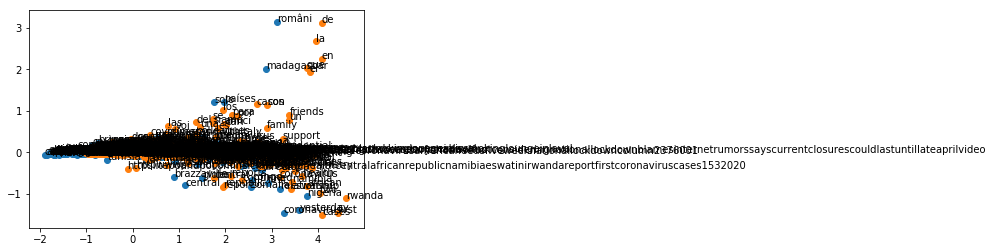

In [50]:
X = model1[model1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


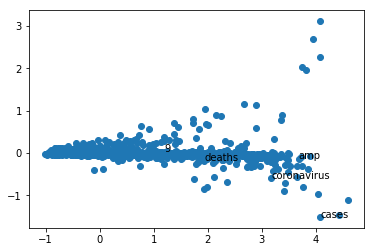

In [57]:
X = model1[model1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model1.wv.vocab)
c=0
for i, word in enumerate(words):
    if c < 5:
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
        c = c+1
pyplot.show()

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
        
        plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
        
        
        
        
        
        
        
        

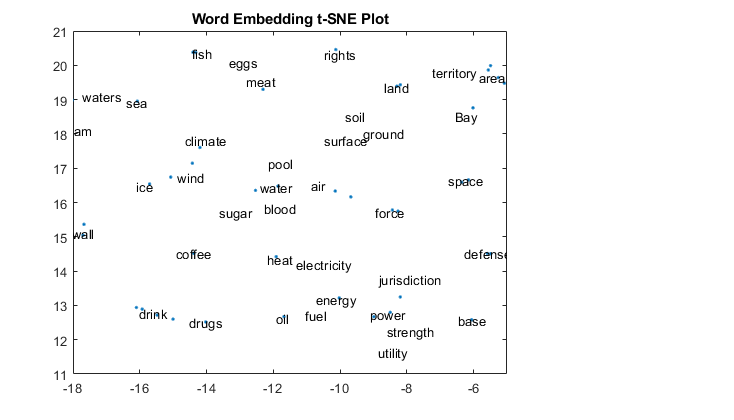